# Getting Started With `matplotlib`

[back to overview page](index.ipynb)

This page is about the general mechanics of plotting with [matplotlib](http://matplotlib.org/), not so much about the plots themselves.
For more information about those, have a look at the [overview page](index.ipynb) and especially at the [external links section](index.ipynb#External-Links).

## Outdated Information

`matplotlib` has been very actively developed in the last few years.
Many improvements have been made and the API as well as the recommended usage patterns have changed quite a bit.

Sadly, this also means that a lot of documentation out there is outdated and may actually, although well intended, be bad advice.
In fact, this very page may be outdated at the time you are reading it!
Have a look at this date:

In [1]:
!date -I

2015-09-01


This is the date of the last change to this page.
If it's older then half a year or a year, it is very likely to be outdated, so don't read it!

## Plotting Step by Step

There are several different ways of using `matplotlib`, here we provide mainly slow-paced step-by-step instructions that show explicitly what has to be done in order to create a plot.

These instructions should help you to create your own individualized plotting functions (see below).

You can also use `matplotlib` in a much less explicit and quicker-to-type way called "pylab" (see further below).

### Importing `matplotlib`

There are several ways to do that, some of which are *not recommended* anymore (especially "`from pylab import *"`).

As far as I know, this is *currently* the canonical and recommended way to import matplotlib for most use cases:

In [2]:
import matplotlib.pyplot as plt

For some specialized cases, you can also import specific classes from certain `matplotlib` sub-modules, e.g.

    from matplotlib.patches import Polygon, Ellipse
    from matplotlib.colors import LinearSegmentedColormap

There are lots of code examples out there that still use them, but the following imports are [not recommended anymore](http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) and you should **never use any of these**:

<pre style="color:gray">
from pylab import *
from matplotlib.pyplot import *
</pre>

### Creating a `Figure` and One or More `Axes` Objects

Before plotting anything, a [Figure object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) has to be created.
Some commands handle figure creation and selection automatically, but it normally makes your code easier to read if you create figures explicitly.

A figure typically contains one or more [Axes objects](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes).
Most plotting commands work on those.

You can create a figure and a single axes object with a single command like this:

In [3]:
fig, ax = plt.subplots()

There are many options you can pass to [plt.subplots()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) in order to customize things, have a look at the documentation of [plt.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure), [add_subplot()](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot) and [GridSpec](http://matplotlib.org/api/gridspec_api.html#matplotlib.gridspec.GridSpec).

If you want more than one `Axes` object, you can specify rows and columns of subplots:

    fig, (ax1, ax2) = plt.subplots(1, 2)

If you want, you can also use [plt.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure) to create a figure object first, and then use [add_axes()](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_axes) and/or [add_subplot()](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot) to add axes objects.

If you want to continue plotting on the previously used `Axes` object, you can use [plt.gca()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca) (= *get current axes*).
If no axes object exists, this command creates one for you (it also creates a figure object, if needed).

Each figure has a (possibly empty) list of references to all its `Axes` objects ...

In [4]:
fig.axes

Obviously, our example figure has one `Axes` object (the one we got from `plt.subplots()` above).

In [5]:
fig.axes[0] is ax

True

Each `Axes` object has a reference to its (exactly one) parent figure:

In [6]:
ax.figure

So don't worry if you misplace your figure reference, you can always get it from any contained `Axes` object.

In [7]:
ax.figure is fig

True

### Plotting Data

In [8]:
data = 4, 8, 15, 16, 23, 42

Once we have an `Axes` object, we can plot data onto it.
There are many types of plots (have a look at the [`Axes` documentation](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)), here we'll just create a simple 2D line plot:

In [9]:
ax.plot(data)

As you can see, this returns a list of graphical objects (in our case it's only one line, but you could plot several lines at once).
You can use those objects for fine-tuning the plot and you can also get a reference to the `Axes` object it belongs to:

In [10]:
_[0].axes is ax

True

> In case you didn't know: The underscore "`_`" is a special variable name that is set by the interactive Python interpreter to the result of the last expression of the previously executed code cell.

If you don't need the returned list, you can hide it by appending a semicolon (this is only necessary in the last line of a code cell).
Let's plot again:

In [11]:
ax.plot(data);

### But Wait, I Don't See No Plot!

Yes, [that's normal](http://matplotlib.org/faq/howto_faq.html#use-show).
Opening a window and drawing all the graphical elements of a plot may be computationally expensive, so `matplotlib` doesn't do it right away.
You might want to add further elements to your plot and it's enough to actually draw it once you are finished.
Also, you might not even want to open a plot window and instead create an image file containing the plot (see below).

Once you are finished adding stuff to your plot and you actually want to show it, use [plt.show()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show):

In [12]:
plt.show()

Now you should see a plot window popping up!

The `plt.show()` command blocks execution until the figure window is closed.
This is useful if you want to show plots from a Python script, otherwise all plot windows would be closed automatically at the end of the script.
It is not very useful in an interactive session, where you should use `matplotlib`'s interactive mode (see [Interactive Plotting](#Interactive-Plotting) below).

Please close the plot window to continue.

### Plotting to a File

Analyzing your data in an interactive plot window is nice, but you probably also want to save the plot for later.
It's very easy to [save a figure to a file](http://matplotlib.org/api/figure_api.html?highlight=savefig#matplotlib.figure.Figure.savefig), e.g. a PNG file:

In [13]:
fig.savefig('my_plot.png')

This creates a file named [my_plot.png](my_plot.png) in the current directory.
You can choose the file type by means of the file extension:

    fig.savefig('my_plot.svg')
    fig.savefig('my_plot.pdf')
    fig.savefig('my_plot.eps')

You can [save multiple figures to one PDF file with `PdfPages`](http://matplotlib.org/faq/howto_faq.html#save-multiple-plots-to-one-pdf-file).

It is also possible to [create PGF files for use in LaTeX documents](http://matplotlib.org/users/pgf.html):

    fig.savefig('my_plot.pgf')

The available image formats depend on the backend, you can get a list for the currently selected backend:

In [14]:
fig.canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

### Closing a Plot

`matplotlib` keeps references to all figures and even if you close all plot windows and delete all your own references, the figures are still kept in memory.

To release all resources for the current figure, use:

In [15]:
plt.close()

To close all figures, use:

In [16]:
plt.close('all')

Note that [plt.clf()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.clf) and [plt.cla()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.cla) clears the current figure and axes, respectively, but it doesn't reset the parameters (e.g. figure size) and it doesn't free all resources.

## Interactive Plotting

By default, `matplotlib` is configured for [non-interactive plotting](http://matplotlib.org/faq/usage_faq.html#what-is-interactive-mode), which makes sense for the use in Python scripts.

In [17]:
plt.isinteractive()

False

In an interactive session (like this IPython notebook), however, it makes much more sense to switch to interactive plotting.

`matplotlib` provides the commands [plt.ion()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ion) and [plt.ioff()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ioff) to turn interactive mode on and off, respectively.
When using Jupyter/IPython, it's even better to use [this "magic" command](http://ipython.org/ipython-doc/stable/interactive/magics.html#magic-matplotlib):

In [18]:
%matplotlib

Using matplotlib backend: TkAgg


This prepares Jupyter/IPython for the use of `matplotlib` and it enables its interactive mode.
This doesn't import anything, you still have to use ...

In [19]:
import matplotlib.pyplot as plt

... to actually import `matplotlib`.

In [20]:
plt.isinteractive()

True

In [21]:
data = 4, 8, 15, 16, 23, 42
fig, ax = plt.subplots()
ax.plot(data);

Now the plot window should open immediately (without calling `plt.show()`) and code cells can be executed even if plot windows are open.

The effects of some of `Axes`'s methods are still not immediately visible, e.g.:

In [22]:
ax.grid()

Use `fig.canvas.draw()` to update the current figure.
Alternatively, you can also use `plt.draw()`.

In [23]:
fig.canvas.draw()  # or plt.draw()

If you put all plotting commands into a single code cell (or if you put them into a separate function, as explained below), you don't need this.

## Inline Plotting

The interactive plot window is very useful for interactive exploration of your data.
However, if you want to share the results of your notebooks with others (or keep them around for future reference), it may be better to embed them directly in the Jupyter/IPython notebook.

To do that, switch to "inline" mode:

In [24]:
%matplotlib inline

From now on, all plots are shown directly below their code cells.

But again, this doesn't import anything, you still have to import whatever you need:

In [25]:
import matplotlib.pyplot as plt

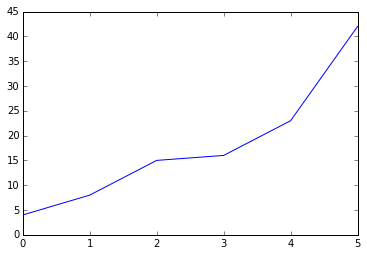

In [26]:
data = 4, 8, 15, 16, 23, 42
fig, ax = plt.subplots()
ax.plot(data);

Inline plots are saved within the notebook file (with the extension `.ipynb`).
Therefore they can be viewed without a running IPython kernel, e.g. on http://nbviewer.ipython.org/ or http://nbviewer.jupyter.org/.

You can switch back and forth between using a plot window and inline plotting:

In [27]:
%matplotlib

Using matplotlib backend: TkAgg


## Advice: Write Your Own Plotting Function!

You will most likely not just plot once and then move on.
More realistically, you'll plot many times while exploring your data and changing some parameters in your calculations.

Depending on the task at hand, you'll have certain requirements regarding axis scaling, tick marks, labels etc.

Instead of repeating the same commands again and again, you should write an individualized plotting function.
Here's an example:

In [28]:
import matplotlib.pyplot as plt
import numpy as np


def myplot(data, ax=None):
    """A special plotting function for my special needs."""
    if ax is None:
        ax = plt.gca()
    x = np.arange(len(data)) * 1000  # my special x-axis needs
    lines = ax.plot(x, data)
    ax.set_xlabel("my independent variable / millisomethings")
    ax.set_ylabel("very interesting unitless values")
    ax.grid(True)
    return lines

Note that this function accepts an optional `ax` argument (as recommended by the [official FAQ](http://matplotlib.org/faq/usage_faq.html#coding-styles)), where an existing `Axes` object can be passed to be drawn on.
By default, the current `Axes` object is used.
If none exists, a new figure with a new `Axes` object is created automatically.
All this is done by [plt.gca()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca) (= *get current axes*).

You should think about what is most useful to be returned from this function, in this example it just passes through the list of lines returned by [plot()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot).

Note that `show()` is not used within the function, as this might not be desired, e.g. if we only want to plot to a file and we don't want to show the plot window.

The custom plotting function can be used like this:

In [29]:
%matplotlib inline

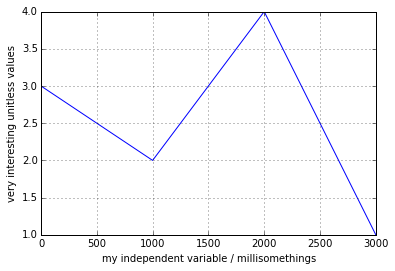

In [30]:
myplot([3, 2, 4, 1]);

By means of the optional `ax` argument it can also be used in more complicated settings, e.g.:

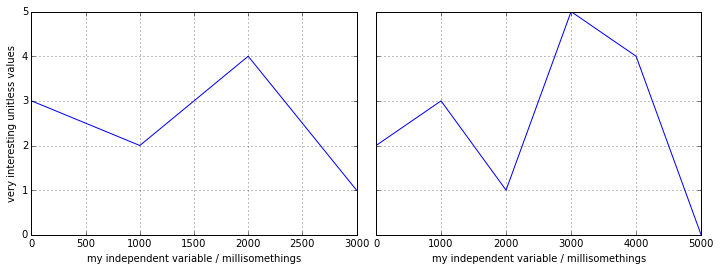

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(fig.get_figwidth() * 2)
fig.subplots_adjust(wspace=0.06)
myplot([3, 2, 4, 1], ax=ax1)
myplot([2, 3, 1, 5, 4, 0], ax=ax2)
ax2.set_ylabel('');

## Finally: The Quick and Dirty Way

The above examples are quite explicit (which is good) and a bit verbose (which might be tedious).

If you just want to quickly fire up an IPython console and make some spontaneous throw-away plots, you can use the so-called "pylab" mode using [the "magic" command](http://ipython.org/ipython-doc/stable/interactive/magics.html#magic-pylab)

    %pylab

or

    %pylab inline
    
Like the command `%matplotlib` we used above, this switches to `matplotlib`'s interactive mode, but in addition it includes a whole lot of convenience functions into the current namespace.
That means you don't need to write any `import` statements and you can use the functions without the `plt.` and `np.` prefixes, e.g.:

    plot(arange(100)**2)

This should significantly reduce the number of characters you have to type (at least on the short term).
However, this is not recommended if you want to keep your code, because the resulting code is hard to read for others (and for future you) and [it may cause some subtle errors](http://nbviewer.ipython.org/github/Carreau/posts/blob/master/10-No-PyLab-Thanks.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>